<a href="https://colab.research.google.com/github/lzeng11bc/pandas-practice/blob/master/AB_Test_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study

## Objective of the Case Study
* Study the effect different vouchers can have on the gmv for shops in various size

## Methodology
* Divide the shops in to three groups based on the gmv size
* During 2021-05-25 to 2021-05-31, conduct A/B test in each group by randomly giving vouchers to orders with gmv that match the designated gmv range
* Test the effectiveness of different combinations of vouchers in each group
* Test the effectiveness of different vouchers in each group

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np

## Read Data

In [ ]:
RAW_DATA = pd.read_excel('case_study.xlsx', 'Raw_Data')
SHOP_LIST = pd.read_excel('case_study.xlsx', 'Shop_List')

In [ ]:
RAW_DATA.shape

(128151, 8)

In [ ]:
SHOP_LIST.shape

(23204, 2)

In [ ]:
RAW_DATA.head(5)

,shop_id,order_id,order_create_date,gmv_usd,shop_voucher_id,shop_voucher_name,shop_voucher_coin_discount_by_seller,shop_voucher_cash_discount_by_seller
0,3078763600,821855235375020,2021-05-15,93.318905,NaN,NaN,0.0,0.0
1,2948456434,822543077817373,2021-05-15,123.554179,NaN,NaN,0.0,0.0
2,2948456434,822659290005069,2021-05-15,142.473856,NaN,NaN,0.0,0.0
3,3319207166,822236220327478,2021-05-15,143.922253,NaN,NaN,0.0,0.0
4,2948223344,821784681821598,2021-05-15,153.970502,NaN,NaN,0.0,0.0


In [ ]:
SHOP_LIST.head(5)

,shopid,GROUP
0,2948219142,1A
1,2239563975,1A
2,3442623844,1A
3,2154578184,1A
4,2192526336,1A


## Visualize Group Size

In [ ]:
SHOP_LIST.GROUP.value_counts().sort_values()

1B    2702
1A    2703
3B    3855
3A    3855
2A    5044
2B    5045
Name: GROUP, dtype: int64

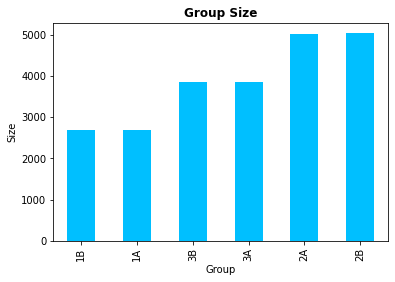

In [ ]:
import matplotlib.pyplot as plt

SHOP_LIST.GROUP.value_counts().sort_values().plot(kind='bar', color='deepskyblue')
plt.xlabel('Group')
plt.ylabel('Size')
plt.title('Group Size', weight='bold')
plt.show()

## Merge 2 WorkSheets

In [ ]:
RAW_DATA.rename(columns={'shop_id':'shopid'}, inplace=True)

In [ ]:
MERGE = RAW_DATA.merge(SHOP_LIST, on='shopid')

In [ ]:
MERGE.head()

,shopid,order_id,order_create_date,gmv_usd,shop_voucher_id,shop_voucher_name,shop_voucher_coin_discount_by_seller,shop_voucher_cash_discount_by_seller,GROUP
0,3078763600,821855235375020,2021-05-15,93.318905,NaN,NaN,0.0,0.0,2A
1,3078763600,822627181098899,2021-05-15,273.463202,NaN,NaN,0.0,0.0,2A
2,3078763600,824071415529747,2021-05-17,93.318905,NaN,NaN,0.0,0.0,2A
3,2948456434,822543077817373,2021-05-15,123.554179,NaN,NaN,0.0,0.0,2B
4,2948456434,822659290005069,2021-05-15,142.473856,NaN,NaN,0.0,0.0,2B


In [ ]:
MERGE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115050 entries, 0 to 115049
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   shopid                                115050 non-null  int64         
 1   order_id                              115050 non-null  int64         
 2   order_create_date                     115050 non-null  datetime64[ns]
 3   gmv_usd                               115050 non-null  float64       
 4   shop_voucher_id                       35099 non-null   float64       
 5   shop_voucher_name                     34646 non-null   object        
 6   shop_voucher_coin_discount_by_seller  115050 non-null  float64       
 7   shop_voucher_cash_discount_by_seller  115050 non-null  float64       
 8   GROUP                                 115050 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory

## Scope of the Data

In [ ]:
MERGE.order_create_date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  115050
unique                     17
top       2021-05-30 00:00:00
freq                     8804
first     2021-05-15 00:00:00
last      2021-05-31 00:00:00
Name: order_create_date, dtype: object

In [ ]:
MERGE.set_index(pd.to_datetime(MERGE.order_create_date), inplace=True)

## Slice Data Based on Date

Only Started to Test Vouchers From 2021-05-25

In [ ]:
MERGE = MERGE.loc['2021-05-25' : '2021-05-31', :]

In [ ]:
MERGE.head()

,shopid,order_id,order_create_date,gmv_usd,shop_voucher_id,shop_voucher_name,shop_voucher_coin_discount_by_seller,shop_voucher_cash_discount_by_seller,GROUP
order_create_date,,,,,,,,,
2021-05-25,2948456434,832157541967741,2021-05-25,259.341337,885465306.0,TESTSV-20%-G2B-T1,24.0,0.0,2B
2021-05-25,2948456434,832209645827054,2021-05-25,259.341337,NaN,NaN,0.0,0.0,2B
2021-05-25,2948456434,832227302241412,2021-05-25,177.869042,885465306.0,TESTSV-20%-G2B-T1,24.0,0.0,2B
2021-05-25,2948456434,832219436580015,2021-05-25,201.858107,885465306.0,TESTSV-20%-G2B-T1,24.0,0.0,2B
2021-05-25,2948456434,831969628942562,2021-05-25,116.131148,NaN,NaN,0.0,0.0,2B


In [ ]:
MERGE.order_create_date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   51516
unique                      7
top       2021-05-30 00:00:00
freq                     8804
first     2021-05-25 00:00:00
last      2021-05-31 00:00:00
Name: order_create_date, dtype: object

## Divide Shops Based on Groups

In [ ]:
MERGE['shop_voucher_name'] = MERGE.shop_voucher_name.fillna('No Discount')

In [ ]:
MERGE['total_discount'] = MERGE['shop_voucher_cash_discount_by_seller'] + MERGE['shop_voucher_coin_discount_by_seller']

In [ ]:
SHOP_1A = MERGE[MERGE.GROUP == '1A']

In [ ]:
SHOP_1B = MERGE[MERGE.GROUP == '1B']

In [ ]:
SHOP_2A = MERGE[MERGE.GROUP == '2A']

In [ ]:
SHOP_2B = MERGE[MERGE.GROUP == '2B']

In [ ]:
SHOP_3A = MERGE[MERGE.GROUP == '3A']

In [ ]:
SHOP_3B = MERGE[MERGE.GROUP == '3B']

## Coupon Distribution in Each Group

### Group 1

In [ ]:
SHOP_1A.shop_voucher_name.value_counts() * 100 / len(SHOP_1A)

TESTSV-18%-G1A-T1    50.986965
No Discount          39.813780
TESTSV-8%-G1A-T2      9.124767
SV3                   0.074488
Name: shop_voucher_name, dtype: float64

In [ ]:
SHOP_1B.shop_voucher_name.value_counts() * 100 / len(SHOP_1B)

TESTSV-20%-G1B-T1    51.697641
No Discount          39.063617
TESTSV-10%-G1B-T2     9.113653
SV52                  0.035740
SV14                  0.035740
SV3                   0.035740
SV26                  0.017870
Name: shop_voucher_name, dtype: float64

### Group 2

In [ ]:
SHOP_2A.shop_voucher_name.value_counts() * 100 / len(SHOP_2A)

TESTSV-15%-G2A-T1    53.102403
No Discount          33.200193
TESTSV-8%-G2A-T2      8.566903
TESTSV-10%-G2A-T3     4.868811
SV52                  0.082639
SV3                   0.068866
SV22                  0.027546
SV11                  0.027546
SV16                  0.020660
SV33                  0.013773
SV13                  0.013773
SV9                   0.006887
Name: shop_voucher_name, dtype: float64

In [ ]:
SHOP_2B.shop_voucher_name.value_counts() * 100 / len(SHOP_2B)

TESTSV-20%-G2B-T1    53.578746
No Discount          31.808869
TESTSV-10%-G2B-T2     9.160003
TESTSV-12%-G2B-T3     5.320204
SV52                  0.033045
SV15                  0.026436
SV7                   0.026436
SV3                   0.019827
SV2                   0.013218
SV16                  0.006609
SV30                  0.006609
Name: shop_voucher_name, dtype: float64

### Group 3

In [ ]:
SHOP_3A.shop_voucher_name.value_counts() * 100 / len(SHOP_3A)

No Discount          33.948607
TESTSV-12%-G3A-T1    28.773073
TESTSV-8%-G3A-T2     21.136446
TESTSV-10%-G3A-T3    15.779949
SV3                   0.307637
SV52                  0.018096
SV53                  0.018096
SV54                  0.018096
Name: shop_voucher_name, dtype: float64

In [ ]:
SHOP_3B.shop_voucher_name.value_counts() * 100 / len(SHOP_3B)

No Discount          31.850335
TESTSV-15%-G3B-T1    29.058079
TESTSV-10%-G3B-T2    21.481757
TESTSV-12%-G3B-T3    17.423678
SV3                   0.074460
SV52                  0.037230
SV8                   0.037230
SV6                   0.018615
SV16                  0.018615
Name: shop_voucher_name, dtype: float64

## Nature of Promotional Method

* The vouchers are being distributed to cover a variety of gmv values(from low, intermediate to high)
* In Group 1, A/B each test two different vouchers. 
* In group 2 and 3, A/B each test three different vouchers.

### Get All Voucher Names

In [ ]:
name_1A = pd.DataFrame({'1A' : SHOP_1A.shop_voucher_name.unique()})
name_1B = pd.DataFrame({'1B' : SHOP_1B.shop_voucher_name.unique()})
voucher_G1 = pd.concat([name_1A, name_1B], axis=1)

In [ ]:
name_2A = pd.DataFrame({'2A' : SHOP_2A.shop_voucher_name.unique()})
name_2B = pd.DataFrame({'2B' : SHOP_2B.shop_voucher_name.unique()})
voucher_G2 = pd.concat([name_2A, name_2B], axis=1)

In [ ]:
name_3A = pd.DataFrame({'3A' : SHOP_3A.shop_voucher_name.unique()})
name_3B = pd.DataFrame({'3B' : SHOP_3B.shop_voucher_name.unique()})
voucher_G3 = pd.concat([name_3A, name_3B], axis=1)

In [ ]:
voucher_G1

,1A,1B
0,TESTSV-18%-G1A-T1,TESTSV-20%-G1B-T1
1,No Discount,No Discount
2,TESTSV-8%-G1A-T2,TESTSV-10%-G1B-T2
3,SV3,SV14
4,NaN,SV26
5,NaN,SV3
6,NaN,SV52


In [ ]:
voucher_G2

,2A,2B
0,TESTSV-15%-G2A-T1,TESTSV-20%-G2B-T1
1,No Discount,No Discount
2,TESTSV-8%-G2A-T2,SV3
3,TESTSV-10%-G2A-T3,TESTSV-10%-G2B-T2
4,SV9,TESTSV-12%-G2B-T3
5,SV22,SV52
6,SV3,SV7
7,SV16,SV2
8,SV52,SV30
9,SV13,SV15


In [ ]:
voucher_G3

,3A,3B
0,TESTSV-10%-G3A-T3,TESTSV-15%-G3B-T1
1,No Discount,TESTSV-10%-G3B-T2
2,TESTSV-12%-G3A-T1,No Discount
3,TESTSV-8%-G3A-T2,TESTSV-12%-G3B-T3
4,SV3,SV3
5,SV52,SV8
6,SV54,SV6
7,SV53,SV52
8,NaN,SV16


### Group 3 Vouhcer Exploration

#### Group 3A

In [ ]:
SHOP_3A[SHOP_3A.shop_voucher_name == 'TESTSV-10%-G3A-T3'].gmv_usd.describe()

count     872.000000
mean     1162.744304
std       716.239535
min       522.949473
25%       741.046281
50%       902.791417
75%      1346.475957
max      7481.226606
Name: gmv_usd, dtype: float64

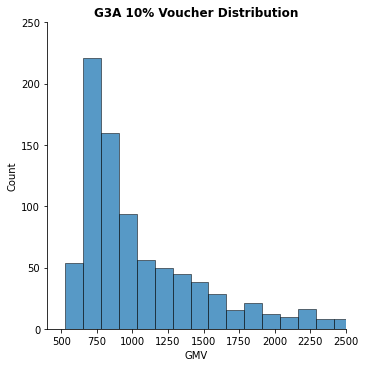

In [ ]:
sns.displot(SHOP_3A[SHOP_3A.shop_voucher_name == 'TESTSV-10%-G3A-T3'].gmv_usd)
plt.axis([400,2500, 0, 250])
plt.xlabel('GMV')
plt.title('G3A 10% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_3A[SHOP_3A.shop_voucher_name == 'TESTSV-8%-G3A-T2'].gmv_usd.describe()

count    1168.000000
mean      498.120730
std       249.250048
min        54.845877
25%       386.754954
50%       469.630383
75%       556.307852
max      4798.977609
Name: gmv_usd, dtype: float64

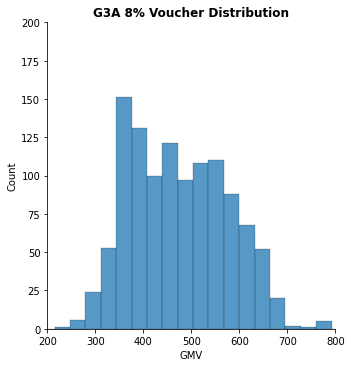

In [ ]:
sns.displot(SHOP_3A[SHOP_3A.shop_voucher_name == 'TESTSV-8%-G3A-T2'].gmv_usd)
plt.axis([200,800, 0, 200])
plt.xlabel('GMV')
plt.title('G3A 8% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_3A[SHOP_3A.shop_voucher_name == 'TESTSV-12%-G3A-T1'].gmv_usd.describe()

count    1590.000000
mean      287.594631
std       286.931330
min         6.596173
25%       183.391053
50%       236.891194
75%       305.305290
max      7009.411494
Name: gmv_usd, dtype: float64

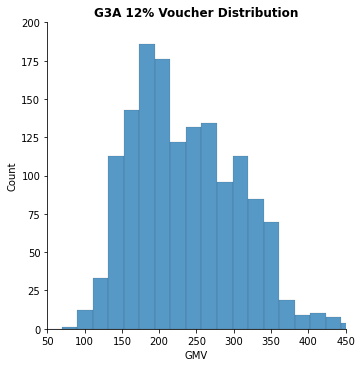

In [ ]:
sns.displot(SHOP_3A[SHOP_3A.shop_voucher_name == 'TESTSV-12%-G3A-T1'].gmv_usd)
plt.axis([50,450, 0, 200])
plt.xlabel('GMV')
plt.title('G3A 12% Voucher Distribution', weight='bold')
plt.show()

#### Group 3B

In [ ]:
SHOP_3B[SHOP_3B.shop_voucher_name == 'TESTSV-15%-G3B-T1'].gmv_usd.describe()

count    1561.000000
mean      277.808391
std       264.833219
min        37.827220
25%       175.334349
50%       231.640757
75%       305.871070
max      6412.491147
Name: gmv_usd, dtype: float64

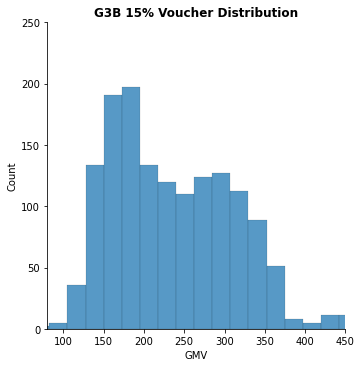

In [ ]:
sns.displot(SHOP_3B[SHOP_3B.shop_voucher_name == 'TESTSV-15%-G3B-T1'].gmv_usd)
plt.axis([80,450, 0, 250])
plt.xlabel('GMV')
plt.title('G3B 15% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_3B[SHOP_3B.shop_voucher_name == 'TESTSV-10%-G3B-T2'].gmv_usd.describe()

count    1154.000000
mean      463.290197
std       150.472347
min        23.433781
25%       370.143658
50%       435.502544
75%       528.697797
max      2861.294862
Name: gmv_usd, dtype: float64

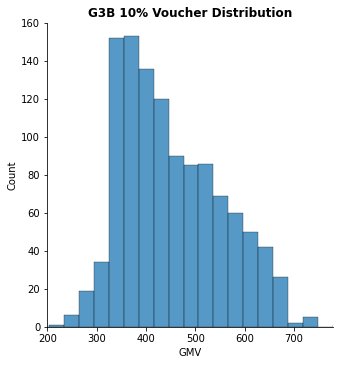

In [ ]:
sns.displot(SHOP_3B[SHOP_3B.shop_voucher_name == 'TESTSV-10%-G3B-T2'].gmv_usd)
plt.axis([200, 780, 0, 160])
plt.xlabel('GMV')
plt.title('G3B 10% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_3B[SHOP_3B.shop_voucher_name == 'TESTSV-12%-G3B-T3'].gmv_usd.describe()

count      936.000000
mean      1172.593150
std        864.927941
min        295.460721
25%        748.491943
50%        933.660365
75%       1316.851725
max      16147.615663
Name: gmv_usd, dtype: float64

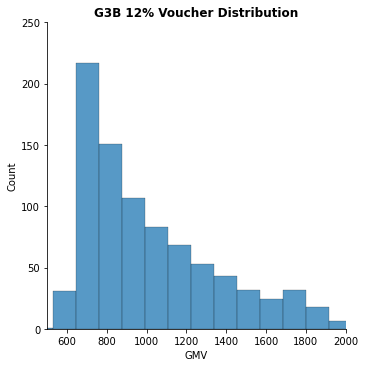

In [ ]:
sns.displot(SHOP_3B[SHOP_3B.shop_voucher_name == 'TESTSV-12%-G3B-T3'].gmv_usd)
plt.axis([500,2000, 0, 250])
plt.xlabel('GMV')
plt.title('G3B 12% Voucher Distribution', weight='bold')
plt.show()

### Group 2 Exploration

#### Group 2A 

In [ ]:
SHOP_2A[SHOP_2A.shop_voucher_name == 'TESTSV-8%-G2A-T2'].gmv_usd.describe()

count    1244.000000
mean      370.540104
std       107.254401
min        49.957539
25%       314.018299
50%       351.812392
75%       413.799230
max      2418.719251
Name: gmv_usd, dtype: float64

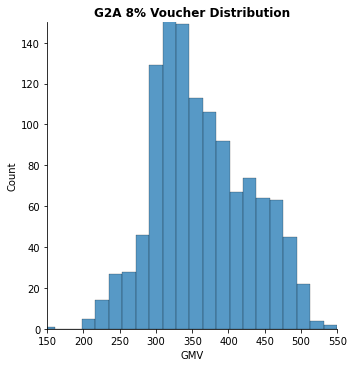

In [ ]:
sns.displot(SHOP_2A[SHOP_2A.shop_voucher_name == 'TESTSV-8%-G2A-T2'].gmv_usd)
plt.axis([150, 550, 0, 150])
plt.xlabel('GMV')
plt.title('G2A 8% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_2A[SHOP_2A.shop_voucher_name == 'TESTSV-15%-G2A-T1'].gmv_usd.describe()

count    7711.000000
mean      164.839227
std        94.281920
min         5.962500
25%       112.148058
50%       148.448491
75%       201.179171
max      2951.910159
Name: gmv_usd, dtype: float64

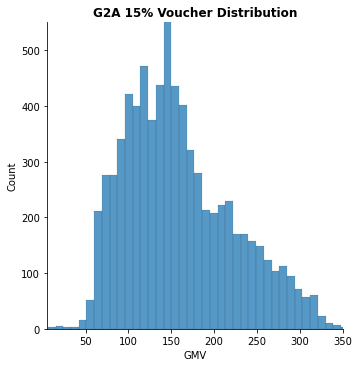

In [ ]:
sns.displot(SHOP_2A[SHOP_2A.shop_voucher_name == 'TESTSV-15%-G2A-T1'].gmv_usd)
plt.axis([5, 350, 0, 550])
plt.xlabel('GMV')
plt.title('G2A 15% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_2A[SHOP_2A.shop_voucher_name == 'TESTSV-10%-G2A-T3'].gmv_usd.describe()

count     707.000000
mean      776.013843
std       447.917349
min        59.734215
25%       532.907198
50%       629.225556
75%       835.486249
max      4932.863747
Name: gmv_usd, dtype: float64

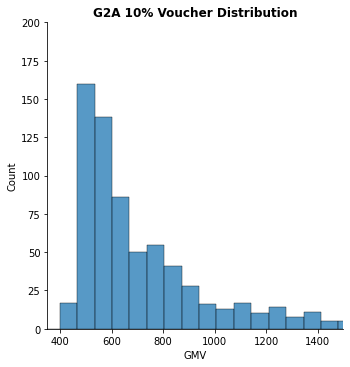

In [ ]:
sns.displot(SHOP_2A[SHOP_2A.shop_voucher_name == 'TESTSV-10%-G2A-T3'].gmv_usd)
plt.axis([350, 1500, 0, 200])
plt.xlabel('GMV')
plt.title('G2A 10% Voucher Distribution', weight='bold')
plt.show()

#### Group 2B

In [ ]:
SHOP_2B[SHOP_2B.shop_voucher_name == 'TESTSV-20%-G2B-T1'].gmv_usd.describe()

count    8107.000000
mean      165.766192
std        97.139799
min         5.962500
25%       111.242810
50%       149.263214
75%       200.726547
max      2754.837730
Name: gmv_usd, dtype: float64

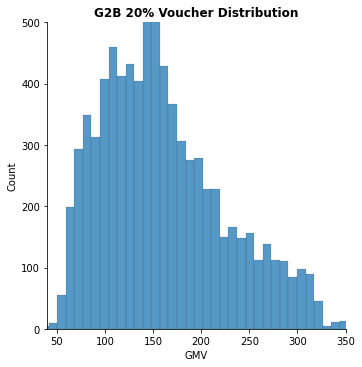

In [ ]:
sns.displot(SHOP_2B[SHOP_2B.shop_voucher_name == 'TESTSV-20%-G2B-T1'].gmv_usd)
plt.axis([40, 350, 0, 500])
plt.xlabel('GMV')
plt.title('G2B 20% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_2B[SHOP_2B.shop_voucher_name == 'TESTSV-10%-G2B-T2'].gmv_usd.describe()

count    1386.000000
mean      362.959806
std       171.877286
min        14.652878
25%       308.156820
50%       346.154594
75%       399.156848
max      5912.070206
Name: gmv_usd, dtype: float64

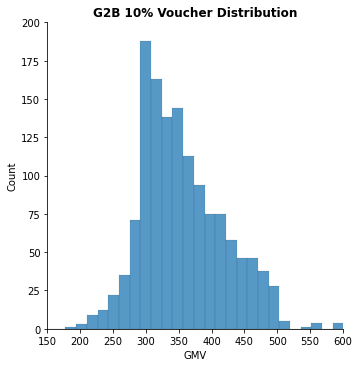

In [ ]:
sns.displot(SHOP_2B[SHOP_2B.shop_voucher_name == 'TESTSV-10%-G2B-T2'].gmv_usd)
plt.axis([150, 600, 0, 200])
plt.xlabel('GMV')
plt.title('G2B 10% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_2B[SHOP_2B.shop_voucher_name == 'TESTSV-12%-G2B-T3'].gmv_usd.describe()

count     805.000000
mean      750.392232
std       510.984716
min        38.098794
25%       537.705011
50%       613.836345
75%       783.570292
max      8907.263341
Name: gmv_usd, dtype: float64

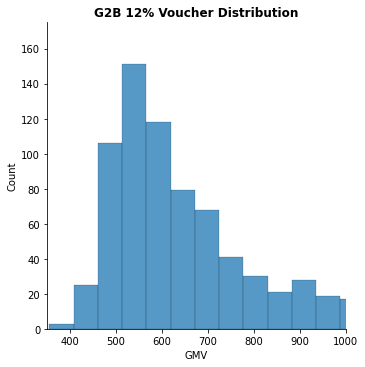

In [ ]:
sns.displot(SHOP_2B[SHOP_2B.shop_voucher_name == 'TESTSV-12%-G2B-T3'].gmv_usd)
plt.axis([350, 1000, 0, 175])
plt.xlabel('GMV')
plt.title('G2B 12% Voucher Distribution', weight='bold')
plt.show()

### Group 1 Voucher Exploration

#### Group 1A

In [ ]:
SHOP_1A[SHOP_1A.shop_voucher_name == 'TESTSV-18%-G1A-T1'].gmv_usd.describe()

count    2738.000000
mean      104.520899
std        72.412711
min        15.014977
25%        70.800868
50%        94.586252
75%       127.786212
max      2542.919238
Name: gmv_usd, dtype: float64

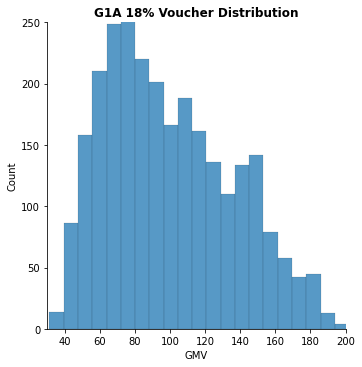

In [ ]:
sns.displot(SHOP_1A[SHOP_1A.shop_voucher_name == 'TESTSV-18%-G1A-T1'].gmv_usd)
plt.axis([30, 200, 0, 250])
plt.xlabel('GMV')
plt.title('G1A 18% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_1A[SHOP_1A.shop_voucher_name == 'TESTSV-8%-G1A-T2'].gmv_usd.describe()

count    490.000000
mean     211.376879
std       44.729799
min      121.924733
25%      182.101075
50%      201.224433
75%      233.858614
max      519.328483
Name: gmv_usd, dtype: float64

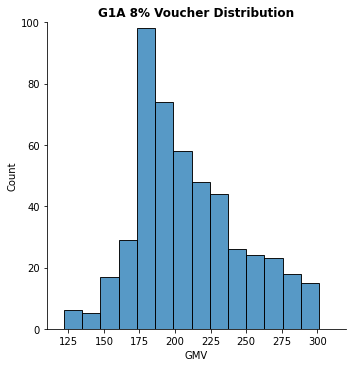

In [ ]:
sns.displot(SHOP_1A[SHOP_1A.shop_voucher_name == 'TESTSV-8%-G1A-T2'].gmv_usd)
plt.axis([110, 320, 0, 100])
plt.xlabel('GMV')
plt.title('G1A 8% Voucher Distribution', weight='bold')
plt.show()

#### Group 1B

In [ ]:
SHOP_1B[SHOP_1B.shop_voucher_name == 'TESTSV-20%-G1B-T1'].gmv_usd.describe()

count    2893.000000
mean      104.062878
std        54.361891
min        15.014977
25%        70.506663
50%        94.676777
75%       128.442517
max       933.388790
Name: gmv_usd, dtype: float64

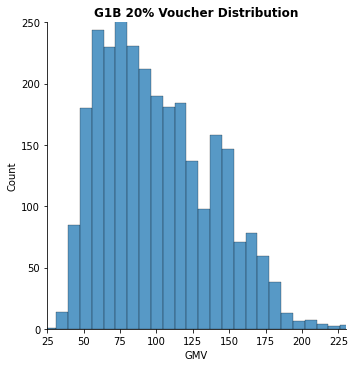

In [ ]:
sns.displot(SHOP_1B[SHOP_1B.shop_voucher_name == 'TESTSV-20%-G1B-T1'].gmv_usd)
plt.axis([25, 230, 0, 250])
plt.xlabel('GMV')
plt.title('G1B 20% Voucher Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_1B[SHOP_1B.shop_voucher_name == 'TESTSV-10%-G1B-T2'].gmv_usd.describe()

count     510.000000
mean      211.029864
std        83.566572
min         5.962500
25%       175.968022
50%       200.364448
75%       231.731282
max      1363.471982
Name: gmv_usd, dtype: float64

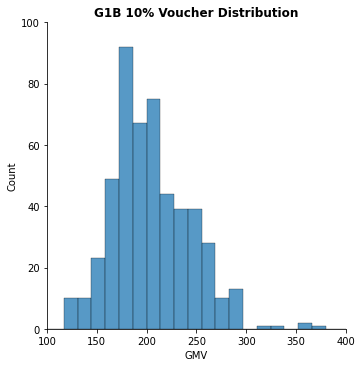

In [ ]:
sns.displot(SHOP_1B[SHOP_1B.shop_voucher_name == 'TESTSV-10%-G1B-T2'].gmv_usd)
plt.axis([100, 400, 0, 100])
plt.xlabel('GMV')
plt.title('G1B 10% Voucher Distribution', weight='bold')
plt.show()

## Group Logic

* Groups are being divided based on the total GMVs of the shops
    * Group 1 includes shops with generally low GMV.
    * Group 2 includes shops with generally medium level GMV.
    * Group 3 includes shops with high GMV.

### Group 1

#### Total GMV

In [ ]:
SHOP_1A.groupby('shopid').agg({'gmv_usd':'sum'}).describe()

,gmv_usd
count,1570.000000
mean,468.317866
std,662.568356
min,15.014977
25%,126.134135
50%,256.646586
75%,520.161164
max,8726.686791


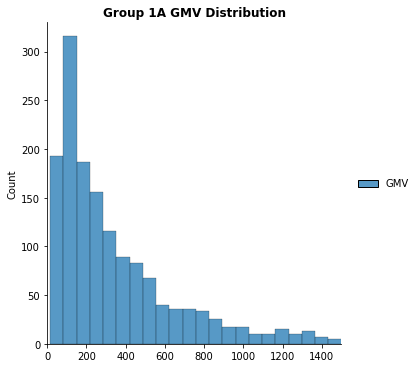

In [ ]:
sns.displot(SHOP_1A.groupby('shopid').agg({'gmv_usd':'sum'}).rename(columns={'gmv_usd':'GMV'}))
plt.axis([0, 1500, 0, 330])
plt.title('Group 1A GMV Distribution', weight='bold')
plt.show()

In [ ]:
SHOP_1B.groupby('shopid').agg({'gmv_usd':'sum'}).describe().rename(columns={'gmv_usd':'GMV'})

,GMV
count,1556.000000
mean,493.021986
std,759.099178
min,26.602148
25%,134.688726
50%,260.907318
75%,540.010359
max,9163.269077


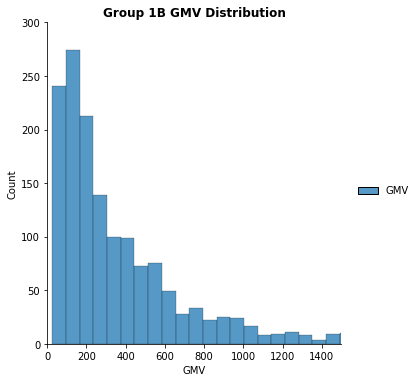

In [ ]:
sns.displot(SHOP_1B.groupby('shopid').agg({'gmv_usd':'sum'}).rename(columns={'gmv_usd':'GMV'}))
plt.axis([0, 1500, 0, 300])
plt.title('Group 1B GMV Distribution', weight='bold')
plt.xlabel('GMV')
plt.show()

### Group 2

#### Total GMV

In [ ]:
SHOP_2A.groupby('shopid').agg({'gmv_usd':'sum'}).describe()

,gmv_usd
count,2908.000000
mean,1096.446824
std,2318.253627
min,37.646170
25%,216.251546
50%,495.309081
75%,1192.894613
max,70236.313758


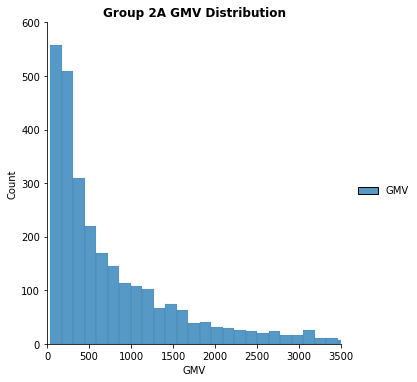

In [ ]:
sns.displot(SHOP_2A.groupby('shopid').agg({'gmv_usd':'sum'}).rename(columns={'gmv_usd':'GMV'}))
plt.axis([0, 3500, 0, 600])
plt.title('Group 2A GMV Distribution', weight='bold')
plt.xlabel('GMV')
plt.show()

In [ ]:
SHOP_2B.groupby('shopid').agg({'gmv_usd':'sum'}).describe()

,gmv_usd
count,2961.000000
mean,1139.117466
std,2953.855340
min,40.090339
25%,230.916559
50%,507.288688
75%,1157.039097
max,122631.329065


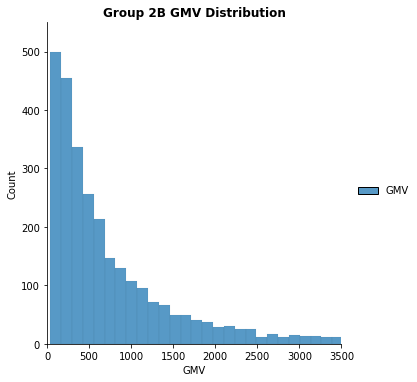

In [ ]:
sns.displot(SHOP_2B.groupby('shopid').agg({'gmv_usd':'sum'}).rename(columns={'gmv_usd':'GMV'}))
plt.axis([0, 3500, 0, 550])
plt.title('Group 2B GMV Distribution', weight='bold')
plt.xlabel('GMV')
plt.show()

### Group 3

#### Total GMV

In [ ]:
SHOP_3A.groupby('shopid').agg({'gmv_usd':'sum'}).describe()

,gmv_usd
count,1521.000000
mean,1755.471214
std,4257.984800
min,17.097047
25%,330.765382
50%,754.228131
75%,1861.581264
max,115318.087830


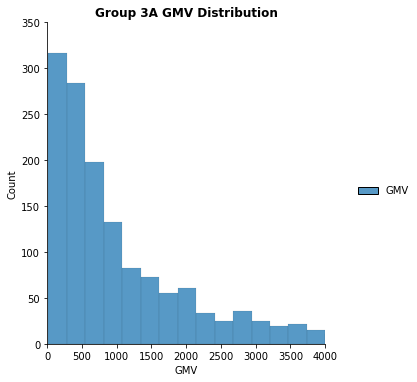

In [ ]:
sns.displot(SHOP_3A.groupby('shopid').agg({'gmv_usd':'sum'}).rename(columns={'gmv_usd':'GMV'}))
plt.axis([0, 4000, 0, 350])
plt.title('Group 3A GMV Distribution', weight='bold')
plt.xlabel('GMV')
plt.show()

In [ ]:
SHOP_3B.groupby('shopid').agg({'gmv_usd':'sum'}).describe()

,gmv_usd
count,1554.000000
mean,1690.481840
std,2937.342179
min,43.982904
25%,316.485100
50%,744.366999
75%,1739.498112
max,26595.240997


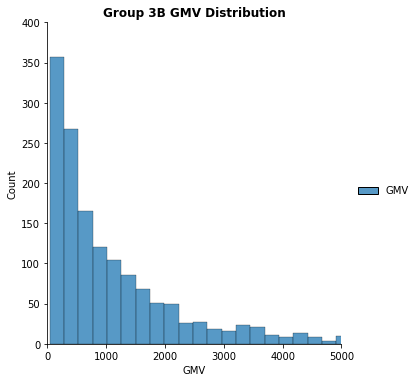

In [ ]:
sns.displot(SHOP_3B.groupby('shopid').agg({'gmv_usd':'sum'}).rename(columns={'gmv_usd':'GMV'}))
plt.axis([0, 5000, 0, 400])
plt.title('Group 3B GMV Distribution', weight='bold')
plt.xlabel('GMV')
plt.show()

### Group GMV Comparison

In [ ]:
gmv_1A = SHOP_1A.groupby('shopid').agg({'gmv_usd':'sum'}).describe().rename(columns={'gmv_usd':'GMV 1A'})
gmv_2A = SHOP_2A.groupby('shopid').agg({'gmv_usd':'sum'}).describe().rename(columns={'gmv_usd':'GMV 2A'})
gmv_3A = SHOP_3A.groupby('shopid').agg({'gmv_usd':'sum'}).describe().rename(columns={'gmv_usd':'GMV 3A'})
df_gmv = pd.concat([gmv_1A, gmv_2A, gmv_3A], axis=1)

In [ ]:
df_gmv 

,GMV 1A,GMV 2A,GMV 3A
count,1570.000000,2908.000000,1521.000000
mean,468.317866,1096.446824,1755.471214
std,662.568356,2318.253627,4257.984800
min,15.014977,37.646170,17.097047
25%,126.134135,216.251546,330.765382
50%,256.646586,495.309081,754.228131
75%,520.161164,1192.894613,1861.581264
max,8726.686791,70236.313758,115318.087830


## AB Test for Each Group

### Group 1

Hypothesis Testing: \
**NULL:**
$$\mu_1 - \mu_2 = 0$$
**Alternatives:**
$$ \mu_2 \neq \mu_1 $$
$$ \mu_2 > \mu_1$$
$$ \mu_2 < \mu_1 $$

Get Mean of each group

#### Group 

In [ ]:
x1 = SHOP_1A.gmv_usd.mean()
x2 = SHOP_1B.gmv_usd.mean()

Find z Statistic

In [ ]:
n1 = len(SHOP_1A.gmv_usd)
n2 = len(SHOP_1B.gmv_usd)
v1 = SHOP_1A.gmv_usd.var()
v2 = SHOP_1B.gmv_usd.var()

In [ ]:
z = (x1 - x2) / ((v1/n1) + (v2/n2))**(1/2)

In [ ]:
z

-0.056079823159194596

In [ ]:
pd.DataFrame({'mean' : [x1, x2], 'Size': [n1, n2], 'Variance': [v1, v2]}, index=['Group 1A', 'Group 1B'])

,mean,Size,Variance
Group 1A,136.919749,5370,26464.034888
Group 1B,137.087600,5596,22554.182513


#### G1 T1

In [ ]:
T1_1A = SHOP_1A[SHOP_1A.shop_voucher_name == 'TESTSV-18%-G1A-T1'].gmv_usd
T1_1B = SHOP_1B[SHOP_1B.shop_voucher_name == 'TESTSV-20%-G1B-T1'].gmv_usd

In [ ]:
x1_t1 = T1_1A.mean()
x2_t1 = T1_1B.mean()
n1_t1 = len(T1_1A)
n2_t1 = len(T1_1B)
v1_t1 = T1_1A.var()
v2_t1 = T1_1B.var()

In [ ]:
z = (x1_t1 - x2_t1) / ((v1_t1/n1_t1) + (v2_t1/n2_t1))**(1/2)

In [ ]:
z

0.2672767335248561

In [ ]:
pd.DataFrame({'mean' : [x1_t1, x2_t1], 'Size': [n1_t1, n2_t1], 'Variance': [v1_t1, v2_t1]}, index=['Group 1A T1', 'Group 1B T1'])

,mean,Size,Variance
Group 1A T1,104.520899,2738,5243.600744
Group 1B T1,104.062878,2893,2955.215221


#### G1 T2

In [ ]:
T2_1A = SHOP_1A[SHOP_1A.shop_voucher_name == 'TESTSV-8%-G1A-T2'].gmv_usd
T2_1B = SHOP_1B[SHOP_1B.shop_voucher_name == 'TESTSV-10%-G1B-T2'].gmv_usd

In [ ]:
x1_t2 = T2_1A.mean()
x2_t2 = T2_1B.mean()
n1_t2 = len(T2_1A)
n2_t2 = len(T2_1B)
v1_t2 = T2_1A.var()
v2_t2 = T2_1B.var()

In [ ]:
z = (x1_t2 - x2_t2) / ((v1_t2/n1_t2) + (v2_t2/n2_t2))**(1/2)

In [ ]:
z

0.08230587055084325

In [ ]:
pd.DataFrame({'mean' : [x1_t2, x2_t2], 'Size': [n1_t2, n2_t2], 'Variance': [v1_t2, v2_t2]}, index=['Group 1A T2', 'Group 1B T2'])

,mean,Size,Variance
Group 1A T2,211.376879,490,2000.754933
Group 1B T2,211.029864,510,6983.371899


### Group 2

Hypothesis Testing: \
**NULL:**
$$\mu_1 - \mu_2 = 0$$
**Alternatives:**
$$ \mu_2 \neq \mu_1 $$
$$ \mu_2 > \mu_1$$
$$ \mu_2 < \mu_1 $$

Get Mean of Each Group

#### Group 

In [ ]:
x1 = SHOP_2A.gmv_usd.mean()
x2 = SHOP_2B.gmv_usd.mean()

In [ ]:
n1 = len(SHOP_2A.gmv_usd)
n2 = len(SHOP_2B.gmv_usd)
v1 = SHOP_2A.gmv_usd.var()
v2 = SHOP_2B.gmv_usd.var()

In [ ]:
z = (x1 - x2) / ((v1/n1) + (v2/n2))**(1/2)

In [ ]:
z

-1.3160301600927318

In [ ]:
pd.DataFrame({'mean' : [x1, x2], 'Size': [n1, n2], 'Variance': [v1, v2]}, index=['Group 2A', 'Group 2B'])

,mean,Size,Variance
Group 2A,219.576294,14521,45619.337624
Group 2B,222.914997,15131,49849.147524


#### G2 T1

In [ ]:
T1_2A = SHOP_2A[SHOP_2A.shop_voucher_name == 'TESTSV-15%-G2A-T1'].gmv_usd
T1_2B = SHOP_2B[SHOP_2B.shop_voucher_name == 'TESTSV-20%-G2B-T1'].gmv_usd

In [ ]:
x1_t1 = T1_2A.mean()
x2_t1 = T1_2B.mean()
n1_t1 = len(T1_2A)
n2_t1 = len(T1_2B)
v1_t1 = T1_2A.var()
v2_t1 = T1_2B.var()

In [ ]:
z = (x1_t1 - x2_t1) / ((v1_t1/n1_t1) + (v2_t1/n2_t1))**(1/2)

In [ ]:
z

-0.6090113279140597

In [ ]:
pd.DataFrame({'mean' : [x1_t1, x2_t1], 'Size': [n1_t1, n2_t1], 'Variance': [v1_t1, v2_t1]}, index=['Group 2A T1', 'Group 2B T1'])

,mean,Size,Variance
Group 2A T1,164.839227,7711,8889.080351
Group 2B T1,165.766192,8107,9436.140469


#### G2 T2

In [ ]:
T2_2A = SHOP_2A[SHOP_2A.shop_voucher_name == 'TESTSV-8%-G2A-T2'].gmv_usd
T2_2B = SHOP_2B[SHOP_2B.shop_voucher_name == 'TESTSV-10%-G2B-T2'].gmv_usd

In [ ]:
x1_t2 = T2_2A.mean()
x2_t2 = T2_2B.mean()
n1_t2 = len(T2_2A)
n2_t2 = len(T2_2B)
v1_t2 = T2_2A.var()
v2_t2 = T2_2B.var()

In [ ]:
z = (x1_t2 - x2_t2) / ((v1_t2/n1_t2) + (v2_t2/n2_t2))**(1/2)

In [ ]:
z

1.3711915013327345

In [ ]:
pd.DataFrame({'mean' : [x1_t2, x2_t2], 'Size': [n1_t2, n2_t2], 'Variance': [v1_t2, v2_t2]}, index=['Group 2A T2', 'Group 2B T2'])

,mean,Size,Variance
Group 2A T2,370.540104,1244,11503.506561
Group 2B T2,362.959806,1386,29541.801496


#### G2 T3

In [ ]:
T3_2A = SHOP_2A[SHOP_2A.shop_voucher_name == 'TESTSV-10%-G2A-T3'].gmv_usd
T3_2B = SHOP_2B[SHOP_2B.shop_voucher_name == 'TESTSV-12%-G2B-T3'].gmv_usd

In [ ]:
x1_t3 = T3_2A.mean()
x2_t3 = T3_2B.mean()
n1_t3 = len(T3_2A)
n2_t3 = len(T3_2B)
v1_t3 = T3_2A.var()
v2_t3 = T3_2B.var()

In [ ]:
z = (x1_t3 - x2_t3) / ((v1_t3/n1_t3) + (v2_t3/n2_t3))**(1/2)

In [ ]:
z

1.0389816134650198

In [ ]:
pd.DataFrame({'mean' : [x1_t3, x2_t3], 'Size': [n1_t3, n2_t3], 'Variance': [v1_t3, v2_t3]}, index=['Group 2A T3', 'Group 2B T3'])

,mean,Size,Variance
Group 2A T3,776.013843,707,200629.951686
Group 2B T3,750.392232,805,261105.380400


### Group 3

Hypothesis Testing: \
**NULL:**
$$\mu_1 - \mu_2 = 0$$
**Alternatives:**
$$ \mu_2 \neq \mu_1 $$
$$ \mu_2 > \mu_1$$
$$ \mu_2 < \mu_1 $$

#### Group 

In [ ]:
x1 = SHOP_3A.gmv_usd.mean()
x2 = SHOP_3B.gmv_usd.mean()
n1 = len(SHOP_3A.gmv_usd)
n2 = len(SHOP_3B.gmv_usd)
v1 = SHOP_3A.gmv_usd.var()
v2 = SHOP_3B.gmv_usd.var()

In [ ]:
z = (x1 - x2) / ((v1/n1) + (v2/n2))**(1/2)

In [ ]:
z

-0.5636681343259431

In [ ]:
pd.DataFrame({'mean' : [x1, x2], 'Size': [n1, n2], 'Variance': [v1, v2]}, index=['Group 2A', 'Group 2B'])

,mean,Size,Variance
Group 2A,483.183445,5526,262017.354966
Group 2B,489.018760,5372,321013.019851


#### G3 T1

In [ ]:
T1_3A = SHOP_3A[SHOP_3A.shop_voucher_name == 'TESTSV-12%-G3A-T1'].gmv_usd
T1_3B = SHOP_3B[SHOP_3B.shop_voucher_name == 'TESTSV-15%-G3B-T1'].gmv_usd

In [ ]:
x1_t1 = T1_3A.mean()
x2_t1 = T1_3B.mean()
n1_t1 = len(T1_3A)
n2_t1 = len(T1_3B)
v1_t1 = T1_3A.var()
v2_t1 = T1_3B.var()

In [ ]:
z = (x1_t1 - x2_t1) / ((v1_t1/n1_t1) + (v2_t1/n2_t1))**(1/2)

In [ ]:
z

0.9951298336725746

In [ ]:
pd.DataFrame({'mean' : [x1_t1, x2_t1], 'Size': [n1_t1, n2_t1], 'Variance': [v1_t1, v2_t1]}, index=['Group 3A T1', 'Group 3B T1'])

,mean,Size,Variance
Group 3A T1,287.594631,1590,82329.588211
Group 3B T1,277.808391,1561,70136.633836


#### G3 T2

In [ ]:
T2_3A = SHOP_3A[SHOP_3A.shop_voucher_name == 'TESTSV-8%-G3A-T2'].gmv_usd
T2_3B = SHOP_3B[SHOP_3B.shop_voucher_name == 'TESTSV-10%-G3B-T2'].gmv_usd

In [ ]:
x1_t2 = T2_3A.mean()
x2_t2 = T2_3B.mean()
n1_t2 = len(T2_3A)
n2_t2 = len(T2_3B)
v1_t2 = T2_3A.var()
v2_t2 = T2_3B.var()

In [ ]:
z = (x1_t2 - x2_t2) / ((v1_t2/n1_t2) + (v2_t2/n2_t2))**(1/2)

In [ ]:
z

4.081918179650946

In [ ]:
pd.DataFrame({'mean' : [x1_t2, x2_t2], 'Size': [n1_t2, n2_t2], 'Variance': [v1_t2, v2_t2]}, index=['Group 3A T2', 'Group 3B T2'])

,mean,Size,Variance
Group 3A T2,498.120730,1168,62125.586246
Group 3B T2,463.290197,1154,22641.927128


#### G3 T3





In [ ]:
T3_3A = SHOP_3A[SHOP_3A.shop_voucher_name == 'TESTSV-10%-G3A-T3'].gmv_usd
T3_3B = SHOP_3B[SHOP_3B.shop_voucher_name == 'TESTSV-12%-G3B-T3'].gmv_usd

In [ ]:
x1_t3 = T3_3A.mean()
x2_t3 = T3_3B.mean()
n1_t3 = len(T3_3A)
n2_t3 = len(T3_3B)
v1_t3 = T3_3A.var()
v2_t3 = T3_3B.var()

In [ ]:
z = (x1_t3 - x2_t3) / ((v1_t3/n1_t3) + (v2_t3/n2_t3))**(1/2)

In [ ]:
z

-0.2643993340158543

In [ ]:
pd.DataFrame({'mean' : [x1_t3, x2_t3], 'Size': [n1_t3, n2_t3], 'Variance': [v1_t3, v2_t3]}, index=['Group 3A T3', 'Group 3B T3'])

,mean,Size,Variance
Group 3A T3,1162.744304,872,512999.071042
Group 3B T3,1172.593150,936,748100.342629
